In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

import math
import sys

In [2]:
# %matplotlib qt5
%matplotlib inline
# %matplotlib ipympl

## Linear behaviour

In [3]:
path = '/home/elife/LabPh/LabPh-MRArray/1_Ring/lin/'
x = scipy.io.loadmat(path + 'x.mat',squeeze_me=True)['x']

#### File were saved swapped ####
# y_dr = scipy.io.loadmat('y_dr.mat')['y_dr']
y_th = scipy.io.loadmat(path + 'y_dr.mat',squeeze_me=True)['y_dr']
# y_th = scipy.io.loadmat('y_th.mat')['y_th']
y_dr = scipy.io.loadmat(path + 'y_th.mat',squeeze_me=True)['y_th']

In [4]:
def lorentzian (xx, A, gamma, x0, c):
    return  A/math.pi * gamma/2 / ((xx - x0)**2 + (gamma/2)**2) + c

def correctedLorentzian (xx, A, gamma, x0, a, b, c):
    return  ( A/math.pi * ( gamma/2 / ((xx - x0)**2 + (gamma/2)**2) ) ) + ( a*xx**2 + b*xx + c )

### Fit of through and drop signal using a Lorentzian function for both

Drop fit:  [ 4.21822818e-01  1.82127904e-02  1.92398628e+02 -3.73205833e-01]
Drop Q-factor = 10563.929
Through fit:  [-8.90217662e-04  1.78367057e-02  1.92398120e+02  9.71645669e-02]
Through Q-factor = 10786.640


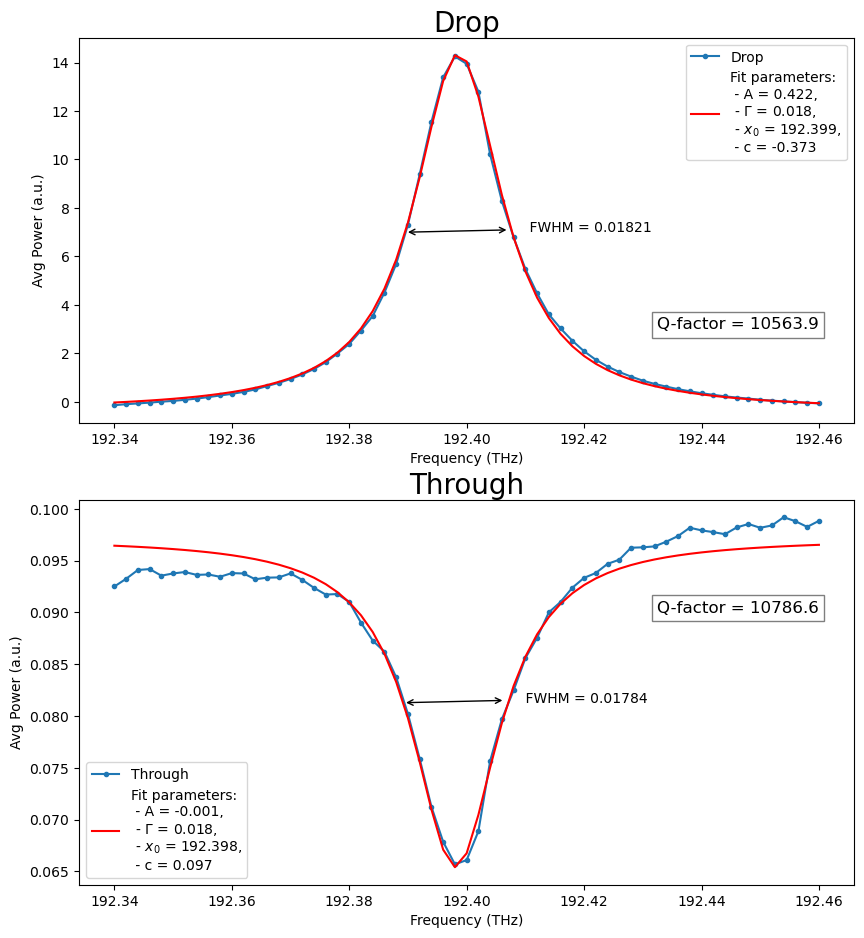

In [5]:
popt_dr, pcov_dr = curve_fit(lorentzian, x, y_dr, p0=[14, 1, 192.4, 0])
d_A_dr = np.sqrt(pcov_dr[0][0])
d_gamma_dr = np.sqrt(pcov_dr[1][1])
d_x0_dr = np.sqrt(pcov_dr[2][2])
d_c_dr = np.sqrt(pcov_dr[3][3])
print('Drop fit: ', popt_dr)
Q_dr = popt_dr[2]/popt_dr[1]
print('Drop Q-factor = %.3f' % Q_dr)

popt_th, _ = curve_fit(lorentzian, x, y_th,p0=[-1, 1, 192, 1], maxfev=1000000)
print('Through fit: ', popt_th)
Q_th = popt_th[2]/popt_th[1]
print('Through Q-factor = %.3f' % Q_th)

fig, ax = plt.subplots(2,1, figsize = (10,11))
fig.subplots_adjust(hspace=0.2)

ax[0].plot(x,y_dr,'.-',label='Drop')
ax[0].set_title('Drop', fontsize=20, pad=1.0)
ax[0].plot(x, lorentzian(x, *popt_dr), 'r-', label='Fit parameters:\n - A = %5.3f,\n - $\Gamma$ = %5.3f,\n - $x_0$ = %5.3f,\n - c = %5.3f' % tuple(popt_dr))
ax[0].annotate(text='    FWHM = %5.5f' % popt_dr[1],
               xy=(popt_dr[2] - popt_dr[1]/2,popt_dr[0]/popt_dr[1]/math.pi + popt_dr[3]),
               xytext=(popt_dr[2] + popt_dr[1]/2,popt_dr[0]/popt_dr[1]/math.pi + popt_dr[3]),
               arrowprops=dict(arrowstyle='<->'))
ax[0].text(192.46, 3, 'Q-factor = %.1f' % Q_dr, fontsize = 12,
           horizontalalignment='right',
           bbox = dict(facecolor = 'white', alpha = 0.5)) 
ax[0].legend()


ax[1].plot(x,y_th,'.-',label='Through')
ax[1].set_title('Through', fontsize=20, pad=1.0)
ax[1].plot(x, lorentzian(x, *popt_th), 'r-', label='Fit parameters:\n - A = %5.3f,\n - $\Gamma$ = %5.3f,\n - $x_0$ = %5.3f,\n - c = %5.3f' % tuple(popt_th))
ax[1].annotate(text='    FWHM = %5.5f' % popt_th[1],
               xy=(popt_th[2] - popt_th[1]/2, popt_th[0]/popt_th[1]/math.pi + popt_th[3]),
               xytext=(popt_th[2] + popt_th[1]/2, popt_th[0]/popt_th[1]/math.pi + popt_th[3]),
               arrowprops=dict(arrowstyle='<->'))
ax[1].text(192.46, 0.09, 'Q-factor = %.1f' % Q_th, fontsize = 12,
           horizontalalignment='right',
           bbox = dict(facecolor = 'white', alpha = 0.5))


for ii in [0,1]:
    # ax[ii].title.set_size(20)
    ax[ii].set_xlabel('Frequency (THz)')
    ax[ii].set_ylabel('Avg Power (a.u.)')
    ax[ii].legend()


plt.show()

### Fit of through and drop signal using a Lorentzian function for the drop signal and a Lorentzian function correted with a parabola for the through signal to consider the effect of the grating

Drop fit:  [ 4.21822818e-01  1.82127904e-02  1.92398628e+02 -3.73205833e-01]
Through fit:  [-9.02851654e-04  1.79572940e-02  1.92398491e+02 -1.78853626e-01
  6.88680156e+01 -6.62934812e+03]
Drop Q-factor = 10563.929
Through Q-factor = 10714.225


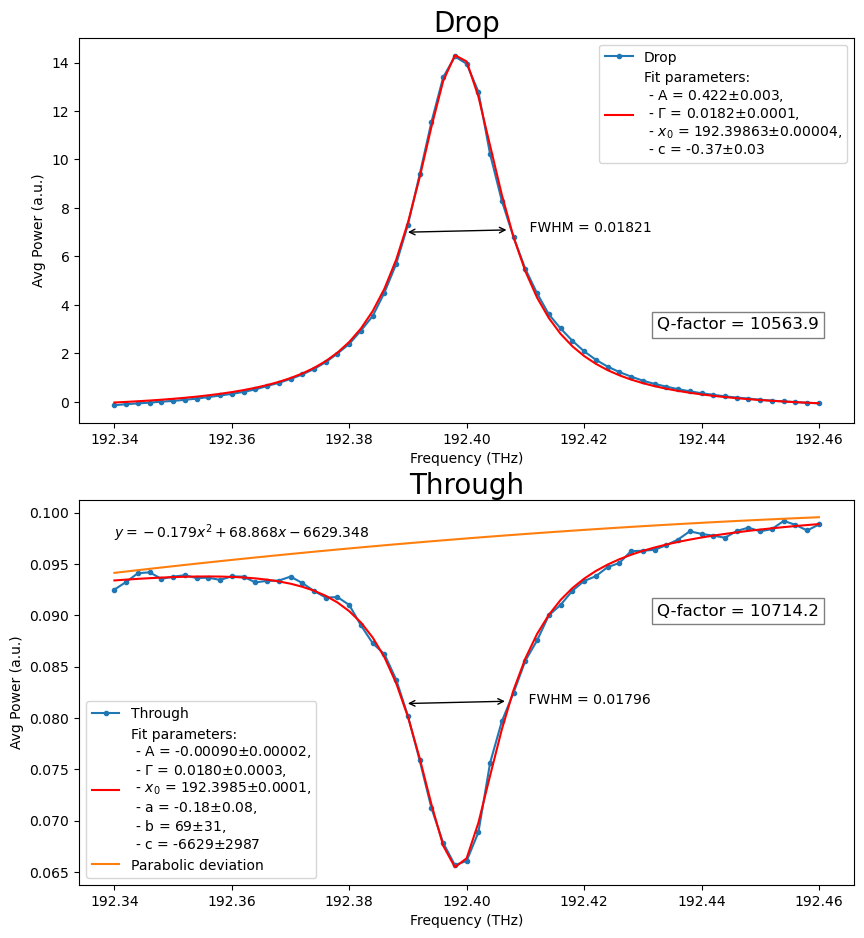

In [6]:
popt_th, pcov_th = curve_fit(correctedLorentzian, x, y_th,p0=[1, -1, 192, 0, 0.08, 1],
                        # bounds=([-np.inf,0,-np.inf,-np.inf,-np.inf,-np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]),
                        maxfev=100000)
d_A_th = np.sqrt(pcov_th[0][0])
d_gamma_th = np.sqrt(pcov_th[1][1])
d_x0_th = np.sqrt(pcov_th[2][2])
d_a_th = np.sqrt(pcov_th[3][3])
d_b_th = np.sqrt(pcov_th[4][4])
d_c_th = np.sqrt(pcov_th[5][5])

print('Drop fit: ', popt_dr)
print('Through fit: ', popt_th)
Q_th = popt_th[2]/popt_th[1]
print('Drop Q-factor = %.3f' % Q_dr)
print('Through Q-factor = %.3f' % Q_th)

fig, ax = plt.subplots(2,1, figsize = (10,11))
fig.subplots_adjust(hspace=0.2)

ax[0].plot(x,y_dr,'.-',label='Drop')
ax[0].set_title('Drop', fontsize=20, pad=1.0)
ax[0].plot(x, lorentzian(x, *popt_dr), 'r-',
           label='Fit parameters:\n - A = %.3f$\pm$%.3f,\n - $\Gamma$ = %.4f$\pm$%.4f,\n - $x_0$ = %.5f$\pm$%.5f,\n - c = %.2f$\pm$%.2f' 
           % tuple([popt_dr[0], d_A_dr, popt_dr[1], d_gamma_dr, popt_dr[2], d_x0_dr, popt_dr[3], d_c_dr]))
ax[0].annotate(text='    FWHM = %5.5f' % popt_dr[1],
               xy=(popt_dr[2] - popt_dr[1]/2,popt_dr[0]/popt_dr[1]/math.pi + popt_dr[3]),
               xytext=(popt_dr[2] + popt_dr[1]/2,popt_dr[0]/popt_dr[1]/math.pi + popt_dr[3]),
               arrowprops=dict(arrowstyle='<->'))
ax[0].text(192.46, 3, 'Q-factor = %.1f' % Q_dr, fontsize = 12,
           horizontalalignment='right',
           bbox = dict(facecolor = 'white', alpha = 0.5)) 

ax[1].plot(x,y_th,'.-',label='Through')
ax[1].set_title('Through', fontsize=20, pad=1.0)
ax[1].plot(x, correctedLorentzian(x, *popt_th), 'r-',
           label='Fit parameters:\n - A = %.5f$\pm$%.5f,\n - $\Gamma$ = %.4f$\pm$%.4f,\n - $x_0$ = %.4f$\pm$%.4f,\n - a = %.2f$\pm$%.2f,\n - b = %.0f$\pm$%.0f,\n - c = %.0f$\pm$%.0f' 
           % tuple([popt_th[0], d_A_th, popt_th[1], d_gamma_th, popt_th[2], d_x0_th, popt_th[3], d_a_th, popt_th[4], d_b_th, popt_th[5], d_c_th]))
ax[1].annotate(text='    FWHM = %5.5f' % popt_th[1],
               xy=(popt_th[2] - popt_th[1]/2, popt_th[0]/popt_th[1]/math.pi + popt_th[3]*popt_th[2]**2 + popt_th[4]*popt_th[2] + popt_th[5]),
               xytext=(popt_th[2] + popt_th[1]/2, popt_th[0]/popt_th[1]/math.pi + popt_th[3]*popt_th[2]**2 + popt_th[4]*popt_th[2] + popt_th[5]),
               arrowprops=dict(arrowstyle='<->'))
ax[1].text(192.46, 0.09, 'Q-factor = %.1f' % Q_th, fontsize = 12,
           horizontalalignment='right',
           bbox = dict(facecolor = 'white', alpha = 0.5))
ax[1].plot(x, popt_th[3]*x**2 + popt_th[4]*x + popt_th[5],label='Parabolic deviation')
ax[1].text(192.34, 0.0975, '$y = %.3f x^2 + %.3f x  %.3f$' % tuple(popt_th[3:]), fontsize = 10,
           horizontalalignment='left')

for ii in [0,1]:
    # ax[ii].title.set_size(20)
    ax[ii].set_xlabel('Frequency (THz)')
    ax[ii].set_ylabel('Avg Power (a.u.)')
    ax[ii].legend()


plt.show()

In [7]:
def parabola(xx, a, b, c):
    return a*xx**2 + b*xx + c

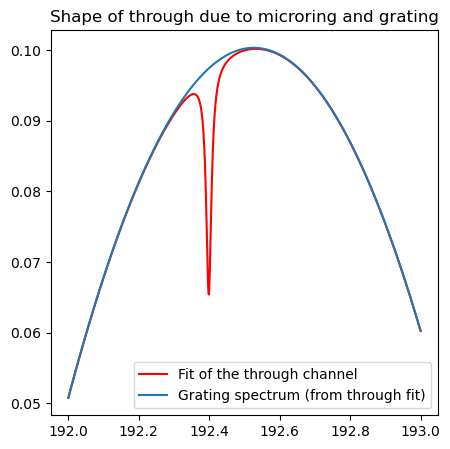

In [8]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

test = np.arange(192,193, 0.0005)

ax.set_title('Shape of through due to microring and grating')

ax.plot(test, correctedLorentzian(test, *popt_th), 'r-', 
        label='Fit of the through channel')
ax.plot(test, parabola(test, *popt_th[3:]), 
        label='Grating spectrum (from through fit)')

ax.legend()
plt.show()

## Non linear behaviour

In [9]:
path = '/home/elife/LabPh/LabPh-MRArray/1_Ring/non-lin/'
x = scipy.io.loadmat(path + 'x.mat',squeeze_me=True)['x']

#### File were saved swapped ####
# y_dr = scipy.io.loadmat('y_dr.mat')['y_dr']
y_th = scipy.io.loadmat(path + 'y_dr.mat',squeeze_me=True)['y_dr']
# y_th = scipy.io.loadmat('y_th.mat')['y_th']
y_dr = scipy.io.loadmat(path + 'y_th.mat',squeeze_me=True)['y_th']

/tmp/ipykernel_13545/2356418968.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[0].plot(x[i_peak_dr], y_dr[i_peak_dr], 'rx', label='Maximum at %f THz' % x[i_peak_dr])
/tmp/ipykernel_13545/2356418968.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax[1].plot(x[i_peak_th], y_th[i_peak_th], 'rx', label='Maximum at %f THz' % x[i_peak_th])


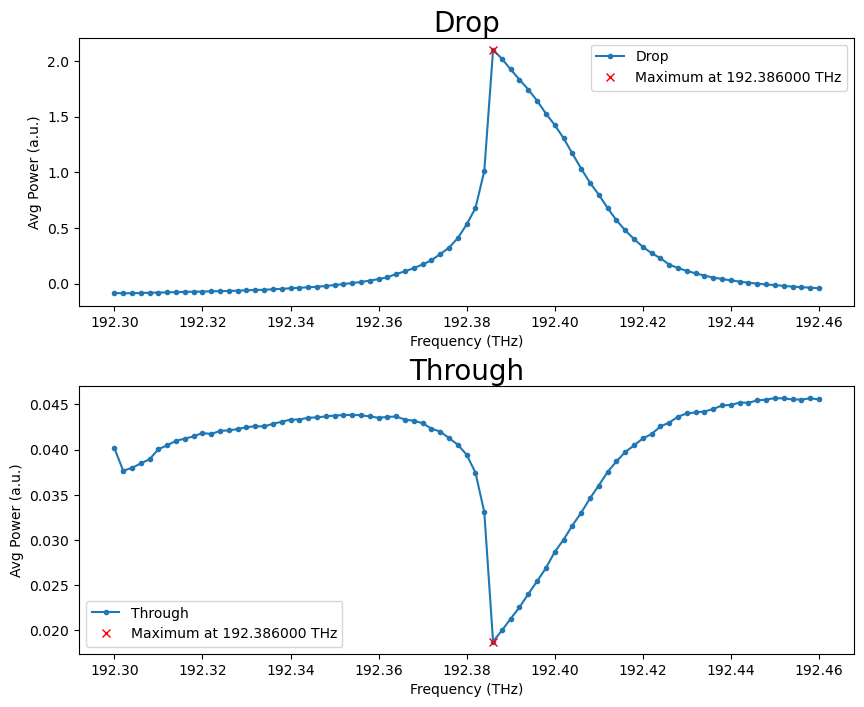

In [10]:
i_peak_dr, _ = find_peaks(y_dr)
i_peak_th, _ = find_peaks(-y_th, height=-0.03)

fig, ax = plt.subplots(2,1, figsize = (10,8))
fig.subplots_adjust(hspace=0.3)

ax[0].plot(x,y_dr,'.-',label='Drop')
ax[0].plot(x[i_peak_dr], y_dr[i_peak_dr], 'rx', label='Maximum at %f THz' % x[i_peak_dr])
ax[0].set_title('Drop', fontsize=20, pad=1.0)

ax[1].plot(x,y_th,'.-',label='Through')
ax[1].plot(x[i_peak_th], y_th[i_peak_th], 'rx', label='Maximum at %f THz' % x[i_peak_th])
ax[1].set_title('Through', fontsize=20, pad=1.0)

for ii in [0,1]:
    ax[ii].set_xlabel('Frequency (THz)')
    ax[ii].set_ylabel('Avg Power (a.u.)')
    ax[ii].legend()

plt.show()

## Time response at different powers and frequencies

In [11]:
path = '/home/elife/LabPh/LabPh-MRArray/1_Ring/structure_1_2023-12-13_10-21/'

params = scipy.io.loadmat(path + f'Parameters_SPmap_2outs.mat',squeeze_me=True)
freq_sweep = params['laserfreq_sweep']
pow_sweep = params['VOAin_pwr_sweep']
sampling_time = params['sampling_step_approx']
sampling_time

1e-09

Plot the measurment at different frequencies and powers.

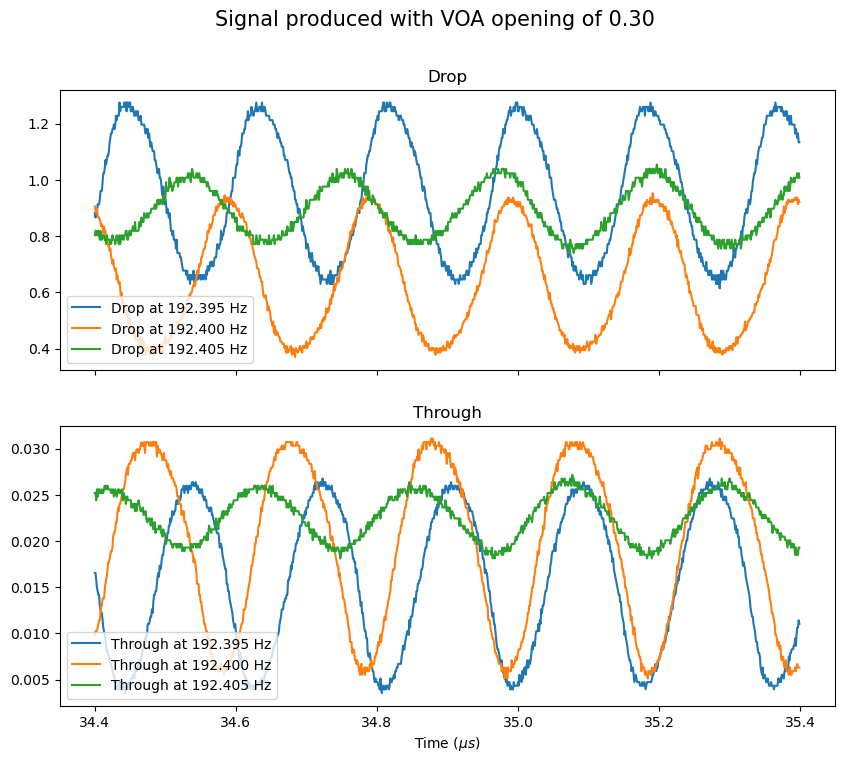

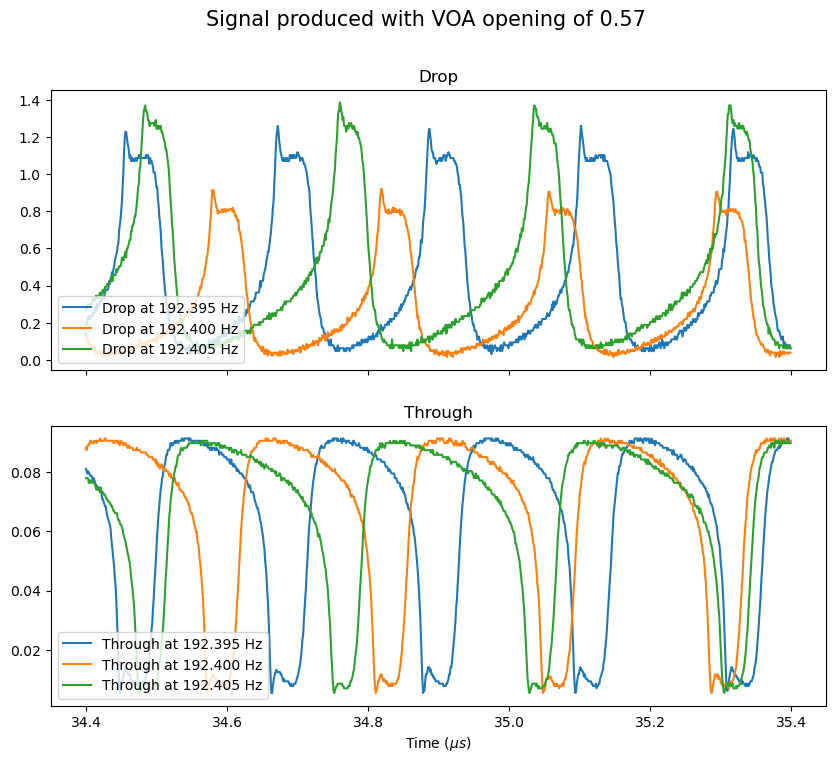

In [12]:
begin = 34400
end = 35400
sampling = 1e-03
time = np.arange(begin * sampling, end * sampling, sampling)

# for pow in range(4,15): # 15
for pow in [4, 8]:
    fig, ax = plt.subplots(2,1, figsize = (10,8))
    
    for freq in range(10,13): # 18
        y_dr = scipy.io.loadmat(path + f'SPmap_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_drop']
        y_th = scipy.io.loadmat(path + f'SPmap_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_through']

        fig.suptitle(F'Signal produced with VOA opening of %.2f' % pow_sweep[pow-1], fontsize=15)

        ax[0].set_title(f'Drop')
        ax[0].plot(time, y_dr[begin:end],label=f'Drop at %.3f Hz' % freq_sweep[freq+1])

        ax[1].set_title(f'Through')
        ax[1].plot(time, y_th[begin:end],label=f'Through at %.3f Hz' % freq_sweep[freq+1])

        for axs in ax.flat:
            axs.set(xlabel='Time ($\mu s$)')
            axs.legend(loc='lower left')

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for axs in ax.flat:
            axs.label_outer()

    plt.show()
    # plt.savefig(f'/home/elife/LabPh/RingArray/1_Ring/graph/Map_iPow{pow}')


In [13]:
plot = 0
write = not plot

drop_frequency = []
drop_prominence = []
through_frequency = []
through_prominence = []

if write:
    file_dr = open('/home/elife/LabPh/LabPh-MRArray/1_Ring/i_peak_dr.txt', 'w')
    file_th = open('/home/elife/LabPh/LabPh-MRArray/1_Ring/i_peak_th.txt', 'w')
    original_stdout = sys.stdout

for pow in range(1,len(pow_sweep)+1):
# for pow in [5]:
    for freq in range(1,len(freq_sweep)+1):
    # for freq in [11, 12,13,14]:
        y_dr = scipy.io.loadmat(path + f'SPmap_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_drop']

        ft_y_dr = np.fft.rfft(y_dr)
        ft_y_dr = abs(ft_y_dr)
        n_dr = y_dr.size
        timestep = 1e-9
        frequency_dr = np.fft.rfftfreq(n_dr, d=timestep)

        i_peak_dr, properties_dr = find_peaks(ft_y_dr, prominence=5)
        max_height_dr = max([abs(ft_y_dr[ii]) for ii in i_peak_dr])
        i_peak_dr, properties_dr = find_peaks(ft_y_dr, height=max_height_dr, prominence=1)
        # i_peak_dr, properties_dr = find_peaks(abs(ft_y_dr), prominence=max(properties_dr['prominences'])-0.5)
        
        drop_frequency += [frequency_dr[i_peak_dr]]
        drop_prominence += [properties_dr['prominences']]
        

        y_th = scipy.io.loadmat(path + f'SPmap_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_through']

        ft_y_th = np.fft.rfft(y_th)
        ft_y_th = abs(ft_y_th)
        n_th = y_th.size
        frequency_th = np.fft.rfftfreq(n_th, d=timestep)

        i_peak_th, properties_th = find_peaks(ft_y_th,prominence=1)
        max_height_th = max([abs(ft_y_th[ii]) for ii in i_peak_th])
        i_peak_th, properties_th = find_peaks(ft_y_th, height=max_height_th, prominence=1)
        # i_peak_th, properties_th = find_peaks(ft_y_th, prominence=max(properties_th['prominences'])-0.5)

        through_frequency += [frequency_th[i_peak_th]]
        through_prominence += [properties_th['prominences']]

        if plot:
            fig, ax = plt.subplots(2,2, figsize = (10,8))
            fig.subplots_adjust(hspace=0.3, wspace=0.3)
            ax[0][0].set_title(f'Drop at power {pow_sweep[pow-1]}')
            ax[0][0].plot(y_dr[34400:35400],label=f'Drop{freq}.{pow}')
            ax[0][0].set_xlabel('Time (ns)')
            ax[0][0].set_ylabel('Avg Power (a.u.)')

            ax[1][0].set_title(f'FFT of drop at power {pow_sweep[pow-1]}')
            ax[1][0].plot(frequency_dr,ft_y_dr,label=f'FFT{freq}.{pow}')
            ax[1][0].set_xlabel('Frequency (Hz)')
            ax[1][0].set_ylabel('Avg Power (a.u.)')

            ax[0][1].set_title(f'Through at power {pow_sweep[pow-1]}')
            ax[0][1].plot(y_th[34400:35400],label=f'Through{freq}.{pow}')
            ax[0][1].set_xlabel('Time (ns)')
            ax[0][1].set_ylabel('Avg Power (a.u.)')

            ax[1][1].set_title(f'FFT of through at power {pow_sweep[pow-1]}')
            ax[1][1].plot(frequency_th,ft_y_th,label=f'FFT{freq}.{pow}')
            ax[1][1].set_xlabel('Frequency (Hz)')
            ax[1][1].set_ylabel('Avg Power (a.u.)')
            
            for ff in i_peak_dr:
                ax[1][0].plot(frequency_dr[ff], ft_y_dr[ff], 'rx', 
                           label='Self-pulsing at freq. %.2f Hz\n with prom. %.2f' % (frequency_dr[ff], properties_dr['prominences'][np.where(i_peak_dr == ff)[0][0]]))
                
            for ff in i_peak_th:
                ax[1][1].plot(frequency_th[ff], ft_y_th[ff], 'rx', 
                           label='Self-pulsing at freq. %.2f Hz\n with prom. %.2f' % (frequency_th[ff], properties_th['prominences'][np.where(i_peak_th == ff)[0][0]]))
            ax[1][0].legend()
            ax[1][1].legend()
            plt.show()

        if write:
            sys.stdout = file_dr
            print(f'pow: {pow}, freq: {freq}, {len(i_peak_dr)} freq. peaks: {frequency_dr[i_peak_dr]}, peaks prominence: {properties_dr["prominences"]}')
            sys.stdout = file_th
            print(f'pow: {pow}, freq: {freq}, {len(i_peak_th)} freq. peaks: {frequency_th[i_peak_th]}, peaks prominence: {properties_th["prominences"]}')
            sys.stdout = original_stdout

if write:
    file_dr.close()
    file_th.close()

print(f'Maximum frequency measured is {max(frequency_th)} Hz')

Maximum frequency measured is 500000000.0 Hz


In absence of self pulsing there is always a prominent peak in the FFT at the frequency of 125 MHz, both in the through signal and the drop signal.

In [14]:
drop_frequency = [x[0] for x in drop_frequency]
drop_prominence = [x[0] for x in drop_prominence]

through_frequency = [x[0] for x in through_frequency]
through_prominence = [x[0] for x in through_prominence]

In [15]:
for ii in range(len(drop_frequency)):
    if (drop_prominence[ii] < 120):
        drop_frequency[ii] = 0

drop_frequency = np.reshape(drop_frequency, (len(pow_sweep),len(freq_sweep)))

for ii in range(len(through_frequency)):
    if (through_prominence[ii] < 20):
        through_frequency[ii] = 0

through_frequency = np.reshape(through_frequency, (len(pow_sweep),len(freq_sweep)))

DROP:
The peaks corresponding to a prominence that is about less than a 100 correspond to noise and they happen when there is no self-pulsing.
The pulse at pow 4 and freq 13 has some self pulsing, but it is very noisy.

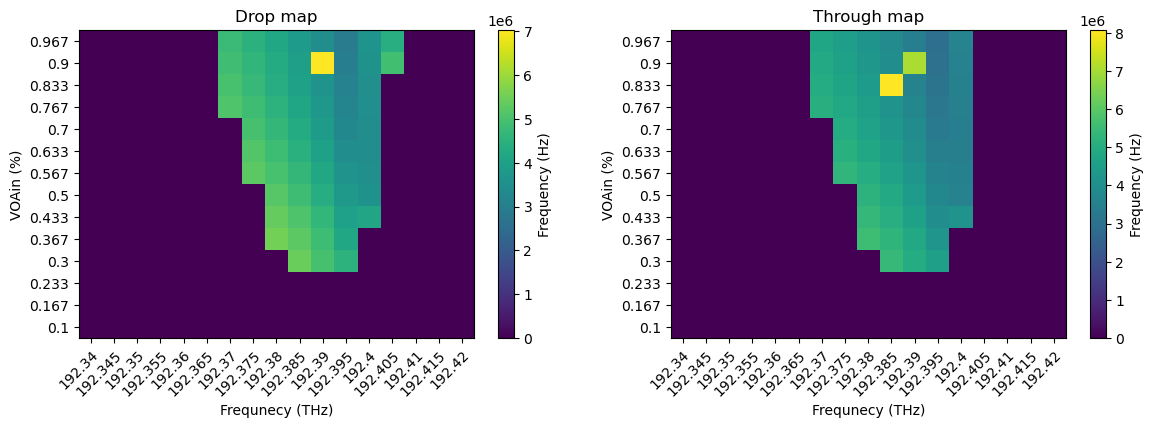

In [16]:
x = np.arange(1, len(freq_sweep) + 1, 1)
y = np.arange(1, len(pow_sweep) + 1, 1)
Z_dr = drop_frequency
Z_th = through_frequency

fig, ax = plt.subplots(1,2, figsize=[14, 4])

im_dr = ax[0].pcolormesh(x, y, Z_dr)
im_th = ax[1].pcolormesh(x, y, Z_th)

cbar_dr = fig.colorbar(im_dr)
cbar_th = fig.colorbar(im_th)

cbar_dr.ax.set_ylabel('Frequency (Hz)')
cbar_th.ax.set_ylabel('Frequency (Hz)')

title = ['Drop map', 'Through map']
for ii in [0,1]:
    ax[ii].set_xlabel('Frequnecy (THz)')
    x_label = np.round(freq_sweep, 3)
    ax[ii].set_xticks(np.arange(1,len(x_label)+1), labels=x_label)
    plt.setp(ax[ii].get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    ax[ii].set_ylabel('VOAin (%)')
    y_label = np.round(pow_sweep, 3)
    ax[ii].set_yticks(np.arange(1,len(y_label)+1), labels=y_label)

    ax[ii].set_title(title[ii])